<a href="https://colab.research.google.com/github/edwin-yan/Passion-Fruit-Disease-Detection/blob/andrew/Image_Augmentation_rotate_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Augmentation

Using this library to do image augmentation
https://albumentations.ai/docs/getting_started/bounding_boxes_augmentation/

# SET UP
## Mounting

Note that this assumes that your google drive folder has the same document layout. You must modify if that is not the case.


From your root Google Drive directory create a couple of folders:
* `JHU/DNN/FinalProject/Train_Images`
* `JHU/DNN/FinalProject/Test_Images` 

with Train and test images unzipped in those directories



# **TODO:** GLOBAL VARIABLE set to `True` if using colab and `False` if not!

In [15]:
IS_COLAB = True 

# **TODO:** CHANGE `IMG_DIR` if your google drive directory is different

In [16]:
if IS_COLAB:
  from google.colab import drive
  drive.mount('/content/drive')
  IMG_PATH = '/content/drive/MyDrive/JHU/DNN/FinalProject'
else:
  IMG_PATH= '.'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
TRAIN_PATH = f'{IMG_PATH}/Train.csv'
TEST_PATH = f'{IMG_PATH}/Test.csv'

In [18]:
import time

t0 = time.time()

## Imports

In [19]:
import tensorflow as tf

Import tf addons
For some reason colab does not allow minor version e.g. specifying 2.6

In [20]:
!pip -q install -U tensorflow_addons > log 
import tensorflow_addons as tfa

In [21]:
!pip install -U albumentations

In [22]:
# Clone from repo and cd into repo
!git clone https://github.com/edwin-yan/Passion-Fruit-Disease-Detection

# Change directory
%cd Passion-Fruit-Disease-Detection

# Checkout specific branch
!git checkout andrew

Cloning into 'Passion-Fruit-Disease-Detection'...
remote: Enumerating objects: 363, done.
remote: Counting objects: 100% (363/363), done.
remote: Compressing objects: 100% (292/292), done.
remote: Total 363 (delta 153), reused 197 (delta 56), pack-reused 0
Receiving objects: 100% (363/363), 193.62 MiB | 14.41 MiB/s, done.
Resolving deltas: 100% (153/153), done.
/content/Passion-Fruit-Disease-Detection/Passion-Fruit-Disease-Detection
Branch 'andrew' set up to track remote branch 'andrew' from 'origin'.
Switched to a new branch 'andrew'


In [23]:
!ls

Baseline_Model.ipynb
Eager_few_shot_od_training_colab_DNN_FINAL.ipynb
EDA_colab.ipynb
EDA.ipynb
helper.py
Image_Augmentation_colab.ipynb
inference_colab.ipynb
Interactive_eager_few_shot_od_training_colab_DNN_FINAL.ipynb
Models
README.md
Test.csv
Test_Images
Train_colab_augmented.ipynb
Train_colab.ipynb
Train.csv
Train_Images
yolo5Input


In [24]:
import pandas as pd
from helper import plot_sample_images, plot_sample_images_multi

In [25]:
import matplotlib.image as img
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
# https://docs.python.org/3/library/uuid.html
import uuid

In [26]:
df_train, df_test = pd.read_csv(TRAIN_PATH), pd.read_csv(TEST_PATH)
print(f"Training Data Shape:  {df_train.shape}\nTest Data Shape:      {df_test.shape}")

Training Data Shape:  (3906, 6)
Test Data Shape:      (931, 1)


In [27]:
df_train.Image_ID.value_counts().head(10)

ID_AF7K88JS    5
ID_M34YFAR2    5
ID_OYN556Y0    5
ID_XEMG90OT    5
ID_LZI2KVVE    5
ID_W18N80QY    4
ID_R0UEKTT1    4
ID_HAC2KQXS    4
ID_1HHF5LHI    4
ID_NCXRHK4H    4
Name: Image_ID, dtype: int64

In [28]:
df_train['class'].value_counts()

fruit_healthy      1638
fruit_woodiness    1246
fruit_brownspot    1022
Name: class, dtype: int64

In [29]:
# plot_sample_images_multi(df_train,dir_path=IMG_PATH)

In [30]:
# plot_sample_images_multi(df_test, show_label=False, is_train=False,dir_path=IMG_PATH)

Try Image Augmentation

I think the require format is https://github.com/Ximilar-com/tf-image/blob/master/tf_image/core/bboxes/rotate.py

 [ymin, xmin, ymin, xmax].

## FIRST update the df_train

In [31]:
IMG_HEIGHT = 512
IMG_WIDTH = 512

In [32]:
df_train.head()

,Image_ID,class,xmin,ymin,width,height
0,ID_007FAIEI,fruit_woodiness,87.0,87.5,228.0,311.0
1,ID_00G8K1V3,fruit_brownspot,97.5,17.5,245.0,354.5
2,ID_00WROUT9,fruit_brownspot,156.5,209.5,248.0,302.5
3,ID_00ZJEEK3,fruit_healthy,125.0,193.0,254.5,217.0
4,ID_018UIENR,fruit_brownspot,79.5,232.5,233.5,182.0


Copy for use later

In [33]:
df_original = df_train.copy()

In [34]:
# get xmax
df_train['xmax'] = df_train['xmin'] + df_train['width']
# get ymax
df_train['ymax'] = df_train['ymin'] + df_train['height']

In [35]:
df_train

,Image_ID,class,xmin,ymin,width,height,xmax,ymax
0,ID_007FAIEI,fruit_woodiness,87.0,87.5,228.0,311.0,315.0,398.5
1,ID_00G8K1V3,fruit_brownspot,97.5,17.5,245.0,354.5,342.5,372.0
2,ID_00WROUT9,fruit_brownspot,156.5,209.5,248.0,302.5,404.5,512.0
3,ID_00ZJEEK3,fruit_healthy,125.0,193.0,254.5,217.0,379.5,410.0
4,ID_018UIENR,fruit_brownspot,79.5,232.5,233.5,182.0,313.0,414.5
...,...,...,...,...,...,...,...,...
3901,ID_ZZAB1FH1,fruit_healthy,96.0,175.5,289.5,222.0,385.5,397.5
3902,ID_ZZAB1FH1,fruit_healthy,330.0,241.0,182.0,180.5,512.0,421.5
3903,ID_ZZJZ2CV6,fruit_healthy,358.0,234.0,134.5,107.0,492.5,341.0
3904,ID_ZZJZ2CV6,fruit_healthy,98.5,135.0,275.5,213.5,374.0,348.5


In [36]:
imgID = 'ID_007FAIEI'

In [37]:
IMAGE_SIZE = 512

In [38]:
import albumentations as A
import cv2

In [65]:
transform = A.Compose([
    # A.HorizontalFlip(p=1),
    # A.RandomBrightnessContrast(p=0.2),
     A.Rotate(p=1)
], bbox_params=A.BboxParams(format='coco'))
# to param
imgID = 'ID_007FAIEI'
train_toRotate_path = f'{IMG_PATH}/Train_Images/{imgID}.jpg'
image = cv2.imread(train_toRotate_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

https://stackoverflow.com/questions/17071871/how-do-i-select-rows-from-a-dataframe-based-on-column-values

In [66]:
exRow = df_train.loc[df_train['Image_ID'] == imgID]
exRow

,Image_ID,class,xmin,ymin,width,height,xmax,ymax
0,ID_007FAIEI,fruit_woodiness,87.0,87.5,228.0,311.0,315.0,398.5


In [67]:
ex_bb = [exRow['xmin'].values[0], 
         exRow['ymin'].values[0],
         exRow['width'].values[0],
         exRow['height'].values[0],
         exRow['class'].values[0]]
ex_bb = [ex_bb]
ex_bb

[[87.0, 87.5, 228.0, 311.0, 'fruit_woodiness']]

In [68]:
transformed = transform(image=image, bboxes=ex_bb)
transformed_image = transformed['image']
transformed_bboxes = transformed['bboxes']

In [69]:
transformed_image

array([[[ 89, 101,  62],
        [ 83,  90,  54],
        [ 78,  82,  50],
        ...,
        [150, 196,  15],
        [166, 210,  15],
        [175, 217,  10]],

       [[ 89,  97,  59],
        [ 81,  87,  53],
        [ 79,  83,  51],
        ...,
        [149, 197,  11],
        [165, 210,  12],
        [173, 214,   8]],

       [[ 91,  96,  60],
        [ 85,  88,  55],
        [ 82,  84,  53],
        ...,
        [148, 194,   6],
        [162, 205,   8],
        [173, 212,   7]],

       ...,

       [[200, 198, 120],
        [177, 180,  99],
        [192, 200, 124],
        ...,
        [126, 171,  97],
        [130, 176, 104],
        [136, 184, 114]],

       [[179, 179,  97],
        [183, 185, 106],
        [206, 212, 138],
        ...,
        [123, 168,  97],
        [140, 189, 119],
        [150, 198, 132]],

       [[161, 168,  79],
        [186, 193, 109],
        [218, 227, 147],
        ...,
        [130, 177, 109],
        [149, 198, 131],
        [151, 198, 137]]

In [70]:
transformed_bboxes

[(36.89481607316111,
  23.072805607462158,
  359.4259696516724,
  384.8049063687897,
  'fruit_woodiness')]

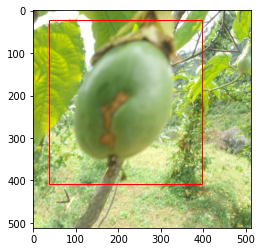

In [71]:
fig, ax = plt.subplots()
from matplotlib.patches import Rectangle
ax.imshow(transformed_image)
rect = Rectangle((36.89481607316111,
  23.072805607462158),359.4259696516724,
  384.8049063687897, linewidth=1, edgecolor='r', facecolor='none')

ax.add_patch(rect)
plt.show()


Code from https://github.com/Ximilar-com/tf-image

In [ ]:
# def rotateImage(imgID,imgClass, xmin_toRot, ymin_toRot,xmax_toRot, ymax_toRot ,df_original):
#   train_toRotate_path = f'{IMG_PATH}/Train_Images/{imgID}.jpg'
#   image = img.imread(train_toRotate_path)

#   xmin_toRot = xmin_toRot
#   ymin_toRot = ymin_toRot
#   xmax_toRot = xmax_toRot
#   ymax_toRot = ymax_toRot

#   print(xmin_toRot, ymin_toRot,xmax_toRot, ymax_toRot)

#   # 
#   # fig, ax = plt.subplots()
#   # from matplotlib.patches import Rectangle
#   # ax.imshow(image)
#   # rect = Rectangle((xmin_toRot,ymin_toRot),xmax_toRot-xmin_toRot,ymax_toRot-ymin_toRot, linewidth=1, edgecolor='r', facecolor='none')

#   # ax.add_patch(rect)
#   # plt.show()

#   image = tf.io.read_file(train_toRotate_path)
#   image = tf.image.decode_jpeg(image)
#   bounding_boxes = tf.constant([[ymin_toRot,xmin_toRot,  ymax_toRot,xmax_toRot ]],dtype=tf.float32)
#   # image_rot, bb  =  random_rotate(
#   #   image, bounding_boxes, min_rotate=-180, max_rotate=180
#   # )

#   image_rot, bb  =  rot45(
#     image, bounding_boxes
#   )
  
#   print('image_rot',image_rot.shape)
#   NEW_IMAGE_SIZE = image_rot.shape[0]
#   # bboxes = flipLR(bounding_boxes)

#   bboxes = bb
#   rotatedBB = (np.array(bboxes))[0]
#   print('rotatedBB',rotatedBB)
#   rotXmin = rotatedBB[0]* NEW_IMAGE_SIZE
#   rotXmax = rotatedBB[1] * NEW_IMAGE_SIZE
#   rotYmin = rotatedBB[2] * NEW_IMAGE_SIZE
#   rotYmax = rotatedBB[3] * NEW_IMAGE_SIZE
#   width = rotXmax - rotXmin
#   height = rotYmax - rotYmin

#   print('rotYmin',rotYmin)
#   print('rotXmin',rotXmin)
#   print('width',width)
#   print('height',height)


#   #
#   # fig, ax = plt.subplots()
#   # from matplotlib.patches import Rectangle
#   # ax.imshow(image_rot)
#   # rect = Rectangle((rotXmin,rotYmin),rotXmax-rotXmin,rotYmax-rotYmin, linewidth=1, edgecolor='r', facecolor='none')

#   # ax.add_patch(rect)
#   # plt.show()

#   # Write augmented image to folder: 
#   # create uuid based on time
#   new_imgID = f'{imgID}_{uuid.uuid1()}'
#   tf_image = tf.image.encode_jpeg(image_rot)
#   # tf.io.write_file(f'{IMG_PATH}/Train_Images_Augmented/{new_imgID}.jpg', tf_image)

#   df_original = df_original.append({  'Image_ID':new_imgID,	'class':imgClass,	'xmin':rotXmin,	'ymin':rotYmin,	'width':width,	'height':height},ignore_index=True)

#   return df_original, image_rot, rotXmin,  rotYmin, width, height


https://stackoverflow.com/questions/55737105/why-wont-tf-write-file-write-a-file

87.0 87.5 315.0 398.5
image_rot (724, 724, 3)
rotatedBB [0.49999997 1.         0.49999997 1.        ]
rotYmin 361.9999784231186
rotXmin 361.9999784231186
width 362.0000215768814
height 362.0000215768814


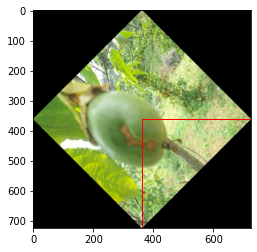

In [ ]:
# for index, row in df_train.iterrows():
#     df_original, image_rot,  rotXmin,  rotYmin, width, height  = rotateImage(row['Image_ID'], row['class'], row['xmin'], row['ymin'], row['xmax'],row['ymax'],df_original)

#     fig, ax = plt.subplots()
#     from matplotlib.patches import Rectangle
#     ax.imshow(image_rot)
#     rect = Rectangle((rotXmin,rotYmin),width,height, linewidth=1, edgecolor='r', facecolor='none')

#     ax.add_patch(rect)
#     plt.show()

#     break

https://stackoverflow.com/questions/54255431/invalidargumenterror-cannot-compute-matmul-as-input-0zero-based-was-expected

https://stackoverflow.com/questions/37435369/matplotlib-how-to-draw-a-rectangle-on-image

In [ ]:
# df_original.to_csv(f'{IMG_PATH}/train_augmented.csv', encoding='utf-8', index=False)